# 2024/06/20

In [2]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_actoin_value = get_action_value(actions[i]) # i번째 action에 대한 행동 가치를 반환한다
        if cur_actoin_value > max_action_value:
            best_action = i # i번째 action을 최고의 action으로 지정
            max_action_value = cur_actoin_value
    return best_action

In [3]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10 # 슬롯머신의 개수
probs = np.random.rand(n) # 각 슬롯머신의 상금이 당첨될 확률 리스트
                          # 각 확률은 슬롯 머신 자체를 가리킴
eps = 0.1
print(probs)

def get_reward(prob, n=10):
    reward = 0
    for i in range(n): # 지정한 슬롯 머신의 레버를 n번 당긴다
        if random.random() < prob: # 무작위 확률이 각 슬롯머신의 상금 당첨 확률보다 작다면 상금에 당첨된 것으로 간주한다
            reward += 1
    return reward

reward_test = [get_reward(0.7) for _ in range(2000)]
np.mean(reward_test)

[0.88008474 0.09151689 0.38042231 0.85716788 0.5734555  0.12734114
 0.87055115 0.97113118 0.47139077 0.31723248]


7.0335

(array([  1.,   2.,  15.,  56., 173., 435., 516., 496., 306.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 9 artists>)

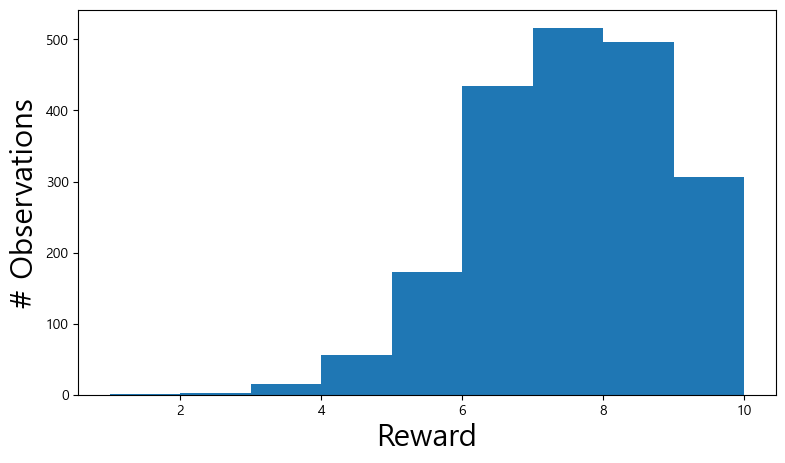

In [9]:
plt.figure(figsize=(9, 5))
plt.xlabel("Reward", fontsize=22)
plt.ylabel("# Observations", fontsize=22)
plt.hist(reward_test, bins=9) # bins=9여야 10개의 간극이 출력된다

# 2024/06/27

[0.31298708 0.39763272 0.56795799 0.82889254 0.5064818  0.65895284
 0.18865731 0.91458124 0.52638286 0.80456146]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


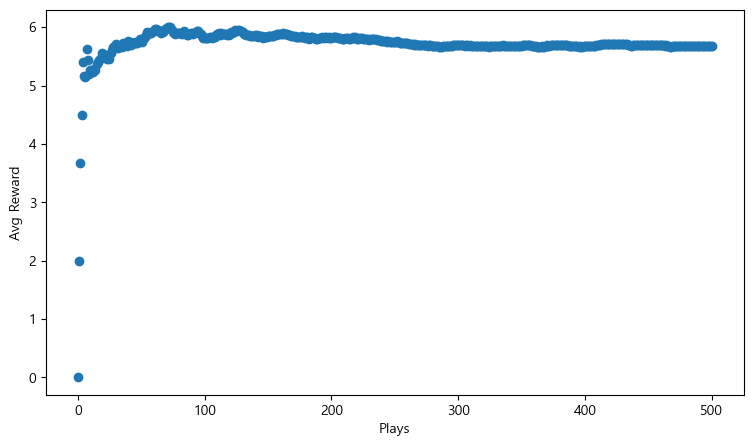

In [7]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10 # 슬롯머신의 개수
probs = np.random.rand(n) # 각 슬롯머신의 상금이 당첨될 확률 리스트
                          # 각 확률은 슬롯 머신 자체를 가리킴
eps = 0.2
print(probs)

def get_reward(prob, n=10):
    reward = 0
    for i in range(n): # 지정한 슬롯 머신의 레버를 n번 당긴다
        if random.random() < prob: # 무작위 확률이 각 슬롯머신의 상금 당첨 확률보다 작다면 상금에 당첨된 것으로 간주한다
            reward += 1
    return reward

record = np.zeros((n, 2)) # 제 1열은 해당 레버를 당긴 횟수, 제 2열은 이전까지 해당 레버를 당겼을 때 얻은 보상의 평균(누적 이동 평균)을 의미한다
print(record)

def get_best_arm(record):
    arm_index = np.argmax(record[:, 1], axis=0) # 각 슬롯 머신들의 평균 보상(누적 이동 평균) 중 가장 큰 값을 가지는 슬롯 머신을 탐색
    return arm_index

def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] += new_r
    return record

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9, 5)
rewards = [0] # 매 시행까지의 얻은 보상들에 대한 평균 보상(누적 이동 평균)을 저장한다
for i in range(500):
    if random.random() > eps: # 무작위로 추출한 확률이 eps 보다 클 경우 활용(exploitation)을 수행한다
        choice = get_best_arm(record) # record를 보고 평균 보상 값이 가장 큰 슬롯 머신을 고른다
    else: # 무작위로 추출한 확률이 eps 보다 작으면 엡실론 탐욕 전략, 즉 탐험(exploration)을 수행한다
        choice = np.random.randint(10) # [0, 10) 범위의 정수 중 하나를 반환한다
    r = get_reward(probs[choice]) # 선택한 슬롯 머신에 대해 10번의 레버 내림을 수행하여 보상을 구한다
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2) # 매 시행(time step)까지 얻은 보상들에 대한 누적 이동 평균을 계산한다
    rewards.append(mean_reward)

# [0, len(rewards))의 반열림 구간에서 일정한 간격(여기서는 1)을 둔 값들을 반환한다
# len(rewards) = 시행 횟수
ax.scatter(np.arange(len(rewards)), rewards) # 좌측이 x축, 우측이 y축을 의미한다

In [4]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 2024/07/19

In [3]:
np.max(np.arange(10))

9

probs : [0.91109017 0.91726186 0.997688   0.82586615 0.65030327 0.91299447
 0.42995644 0.34524208 0.80014578 0.54982363]


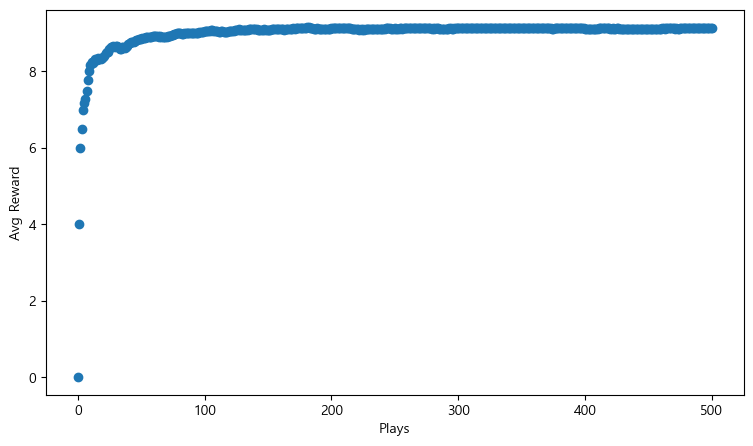

In [45]:
'''
    코렙에서는 잘 되는데 쥬피터 환경에서는 nan 오류가 계속 발생하고,
    nan 오류를 해결하더라도("- np.max(av)"를 통해) 그래프가 제대로 출력되지 않는다
    따라서 이 부분의 실습은 그냥 넘어가기로 한다
'''

import numpy as np
import matplotlib.pyplot as plt
import random
from torch.nn import functional as F

# 아래의 소프트맥스 함수를 그대로 사용하면 프로그램 실행 중간에 nan 오류가 발생하는 것을 확인할 수 있는데,
# 이는  e가 1보다 크기 때문에 거듭 제곱을 계속하면 매우 큰 수가 되어 계산에 문제가 되기 때문이다
# 따라서 입력값(여기서는 av)에서 가장 큰 값을 입력값으로부터 빼주어야 한다
def softmax(av, tau=1.12):
    softm = (np.exp(av / tau) / np.sum(np.exp(av / tau)))
    return softm

def get_reward(prob, n=10): # prob은 어떤 슬롯 머신의 레버를 당길 것인지 명시하는 역할을 한다
    reward = 0
    for i in range(n): # 지정한 슬롯 머신의 레버를 n번 당긴다
        if random.random() < prob: # 무작위 확률이 각 슬롯머신의 상금 당첨 확률보다 작다면 상금에 당첨된 것으로 간주한다
            reward += 1
    return reward
    
def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] += new_r
    return record

n = 10
probs = np.random.rand(n)
print(f"probs : {probs}")
record = np.zeros((n, 2))

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9, 5)

rewards = [0] # 각 시행마다 얻은 보상들을 포함한 평균을 저장한다
for i in range(500):
    # p = softmax(record[:, 1], tau=0.7) # 각 동작들의 기대 보상(가치)에 대한 확률 분포를 반환한다
    p = F.softmax(torch.tensor(record[:, 1]), dim=0).numpy()
    choice = np.random.choice(np.arange(n), p=p) # 소프트맥스 확률 분포에 기초하여 동작 하나를 선택한다
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = (((i + 1) * rewards[-1] + r) / (i + 2))
    rewards.append(mean_reward)
# print(len(rewards), rewards)
ax.scatter(np.arange(len(rewards)), rewards) # (해결함; 49번 라인 코드의 연산 순서 문제였음)코렙에서는 잘만 되는데 여기서는 안된다

# 2024/07/24

experiment (state, reward): (3, 2)


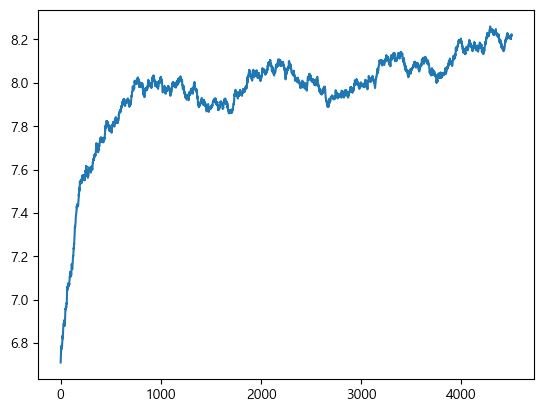

In [36]:
import random
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt

''' 환경 생성 '''
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()

    def init_distribution(self, arms):
        self.bandit_matrix = np.random.rand(arms, arms) # arms x arms 행렬을 생성한다

    def reward(self, prob):
        reward = 0
        for i in range(self.arms): # self.arms만큼 반복한다는 의미이다
            if random.random() < prob:
                reward += 1
        return reward

    def get_state(self):
        return self.state # 현재 상태를 반환한다

    def update_state(self):
        # 상태는 무작위로 갱신한다
        self.state = np.random.randint(0, self.arms) # [0, self.arms)의 구간에서 무작위로 정수를 추출한다

    def get_reward(self, arm):
        # bandit_matrix는 arms x arms 형태의 행렬로,
        # arms개의 상태와 arms개의 행동들로 구성된 행렬이다
        # 아래의 코드는 특정 상태일 때 특정 행동이 보상을 얻을 확률을 반환한다
        return self.reward(self.bandit_matrix[self.get_state()][arm])

    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val # 원-핫 벡터의 특정 성분만 1로 설정한다
    return one_hot_vec

def running_mean(x, N=50): # running_mean = moving average = 이동 평균
    # x = 매 학습세대 마다 반환된 보상들로 이루어진 ndarray
    # x.shape[0] = 5000(학습을 5000번 수행하므로 보상도 5000개가 반환된다)
    cnt = x.shape[0] - N # c = 5000 - 500 = 4500
    y = np.zeros(cnt + 1) # (4501,)형태의 0으로 채워진 ndarray
    conv = np.ones(N) # (500,)형태의 1로 채워진 ndarray, 대량의 덧셈 연산을 위한 행렬렬
    # 아래의 반복문은 5000개의 보상들을 500개씩 전진하며 평균을 계산하는 코드이다
    # 5000개의 보상들을 500개씩 전진하며 평균을 구한는 과정은 총 5000 - 500 + 1 = 4501번 수행된다
    # "x[i:i+N] @ conv"를 수행하면 500개의 보상들을 모두 더하는 것과 같은 결과를 반환한다(sum()을 쓰지 않고 행렬곱으로 처리하는 것으로 보아, 행렬곱 연산이 더 빠른 것으로 추정된다)
    for i in range(cnt + 1):
        y[i] = (x[i:i+N] @ conv) / N # "@"는 넘파이에서 행렬곱을 의미한다
    return y

arms = 10
''' 
    N = batch 크기,
    D_in = 입력 벡터의 차원,
    H = 은닉 계층 노드 수,
    D_out = 출력 벡터의 차원
'''
N, D_in, H, D_out = 1, arms, 100, arms

env = ContextBandit(arms=10)
state = env.get_state() # 현재 상태를 불러온다
reward = env.choose_arm(1) # 현재 상태에서 두번째 광고를 게시한다
print(f"experiment (state, reward): {state, reward}")

''' 모델 구현 '''
model = torch.nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
    nn.ReLU()
)

''' 손실 함수 및 옵티마이저 정의 '''
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2) # 1e-2 = 0.01

''' 학습 함수 구현 '''
def train(env, epochs=5000, lr=1e-2):
    cur_state = torch.tensor(one_hot(arms, env.get_state()), dtype=torch.float) # 현재 상태를 원-핫 벡터로 만든다
    rewards = []
    for i in range(epochs):
        ''' 예측 기대 보상을 기반으로 한 행동 선택 '''
        y_pred = model(cur_state) # 출력은 입력 상태에서 취할 수 있는 각 행동의 기대 보상이다
        av_softmax = F.softmax(y_pred.detach().clone(), dim=0).numpy()
        # av_softmax /= av_softmax.sum() # 가끔씩 교재에서 제안한 커스텀 소프트맥스로 출력된 확률들의 합이 1이 되지 안을 때가 있는데, 이를 방지하기 위한 처리이다
        choice = np.random.choice(arms, p=av_softmax) # (선택) 확률 분포를 바탕으로 행동을 하나 선택한다
        
        ''' 실제 기대 보상 계산 '''
        cur_reward = env.choose_arm(choice) # 현재 상태에서 선택된 행동에 대한 실제 기대 보상(스칼라이다)을 계산한다
        rewards.append(cur_reward)

        ''' label 생성 '''
        label = y_pred.detach().clone()
        label[choice] = cur_reward
        
        loss = loss_fn(y_pred, label)

        ''' 오차 역전파 수행 '''
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ''' 다음 학습을 위한 입력값 준비 '''
        cur_state = torch.tensor(one_hot(arms, env.get_state()), dtype=torch.float)
    return np.array(rewards)

rewards = train(env)
plt.plot(running_mean(rewards, N=500))

In [3]:
import numpy as np
np.ones(50).shape, np.ones(50)[0:2], 1e-2

((50,), array([1., 1.]), 0.01)

In [15]:
import torch
a = torch.tensor([1,2,3,4,5,6], dtype=torch.float16)
a[2] = 7
a

tensor([1., 2., 7., 4., 5., 6.], dtype=torch.float16)

In [23]:
a = np.random.randint(0, 50, (50,))
b = np.ones(a.shape[0])
print(a.shape, b.shape)
a @ b

(50,) (50,)


1207.0

In [24]:
a = np.random.randint(0, 500, (5000,))
count = 0
stop = True
i = 0
while stop:
    if i+500 <= a.shape[0]:
        count += 1
        i += 1
    else:
        stop = False
print(count)

4501
